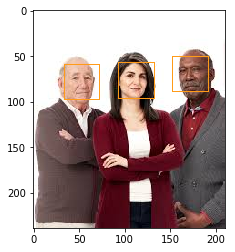

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fc=cv2.CascadeClassifier('./files/haarcascade_frontalface_alt.xml')
sf=1

img=cv2.cvtColor(cv2.imread('testimg2.jpg'),cv2.COLOR_BGR2RGB)
img=cv2.resize(img,None,fx=sf,fy=sf,interpolation=cv2.INTER_AREA)
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

face_rects=fc.detectMultiScale(gray,1.2,2)

for(x,y,w,h) in face_rects:
    temp=cv2.rectangle(img,(x,y),(x+w,y+h),(255,155,25),1)
    plt.imshow(img)

In [7]:
#simple linear regrassions
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
from sklearn import linear_model



In [3]:
df=pd.read_csv('FuelConsumption.csv')
df.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

In [4]:
ndf=df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
ndf.head()
len(ndf)

1067

In [6]:
reg=linear_model.LinearRegression()
reg.fit(df[['ENGINESIZE']],df[['CO2EMISSIONS']])
print('CO2EMISSIONS: ',reg.coef_)
print('Intercept: ',reg.intercept_)


CO2EMISSIONS:  [[39.12519979]]
Intercept:  [125.3040995]


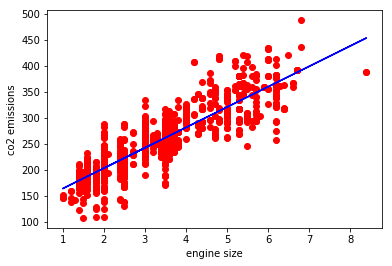

In [9]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS,color='red')
plt.plot(df.ENGINESIZE,reg.coef_[0][0]*df.ENGINESIZE+reg.intercept_[0],'-b')
plt.xlabel('engine size')
plt.ylabel('co2 emissions')
plt.show()

In [7]:
#regration

import numpy as np
from sklearn import preprocessing

data=np.array([[1,2.5,0.1,50],[1.5,2,2.5,0.6],[1.3,2.2,0.7,2.6]])
data_standardize=preprocessing.scale(data)

print(data.mean(axis=0))
print(data.std(axis=0))
print(data_standardize.mean(axis=0))
print(data_standardize.std(axis=0))

[ 1.26666667  2.23333333  1.1        17.73333333]
[ 0.20548047  0.20548047  1.0198039  22.83058378]
[ 3.51570624e-16  0.00000000e+00  7.40148683e-17 -3.70074342e-17]
[1. 1. 1. 1.]


In [9]:
#scaling
data_scaler=preprocessing.MinMaxScaler(feature_range=(1,2))
data_scaler=data_scaler.fit_transform(data)
print(data_scaler)

[[1.         2.         1.         2.        ]
 [2.         1.         2.         1.        ]
 [1.6        1.4        1.25       1.04048583]]


In [12]:
#normalization
print(data)
print("-----------------------")
data_normalizetion=preprocessing.normalize(data,norm='l1')
print(data_normalizetion)

[[ 1.   2.5  0.1 50. ]
 [ 1.5  2.   2.5  0.6]
 [ 1.3  2.2  0.7  2.6]]
-----------------------
[[0.01865672 0.04664179 0.00186567 0.93283582]
 [0.22727273 0.3030303  0.37878788 0.09090909]
 [0.19117647 0.32352941 0.10294118 0.38235294]]


In [18]:
#binarization
print(data)
print("-----------------------")
data_binarization=preprocessing.Binarizer().transform(data)
print(data_binarization)

[[ 1.   2.5  0.1 50. ]
 [ 1.5  2.   2.5  0.6]
 [ 1.3  2.2  0.7  2.6]]
-----------------------
[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


In [1]:
#one hot encoding

X=[]
Y=[]
data=open("data1.txt",'r')
for i in data:
    x,y=i.split(",")
    X.append(float(x))
    Y.append(float(y))
print(X)
print(Y)

[33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31.0, 35.3, 30.5, 0.0, 37.6, 38.0, 27.1, 30.1, 25.8, 30.0, 45.8, 29.6, 43.3, 34.6, 39.3, 35.4, 39.8, 29.0, 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36.0, 31.6, 24.8, 19.9, 27.6, 24.0, 33.2, 32.9, 38.2, 37.1, 34.0, 40.2, 22.7, 45.4, 27.4, 42.0, 29.7, 28.0, 39.1, 0.0, 19.4, 24.2, 24.4, 33.7, 34.7, 23.0, 37.7, 46.8, 40.5, 41.5, 0.0, 32.9, 25.0, 25.4, 32.8, 29.0, 32.5, 42.7, 19.6, 28.9, 32.9, 28.6, 43.4, 35.1, 32.0, 24.7, 32.6, 37.7, 43.2, 25.0, 22.4, 0.0, 29.3, 24.6, 48.8, 32.4, 36.6, 38.5, 37.1, 26.5, 19.1, 32.0, 46.7, 23.8, 24.7, 33.9, 31.6, 20.4, 28.7, 49.7, 39.0, 26.1, 22.5, 26.6, 39.6, 28.7, 22.4, 29.5, 34.3, 37.4, 33.3, 34.0, 31.2, 34.0, 30.5, 31.2, 34.0, 33.7, 28.2, 23.2, 53.2, 34.2, 33.6, 26.8, 33.3, 55.0, 42.9, 33.3, 34.5, 27.9, 29.7, 33.3, 34.5, 38.3, 21.1, 33.8, 30.8, 28.7, 31.2, 36.9, 21.1, 39.5, 32.5, 32.4, 32.8, 0.0, 32.8, 30.5, 33.7, 27.3, 37.4, 21.9, 34.3, 40.6, 47.9, 50.0, 24.6, 25.2, 29.0, 40.9, 29.7, 37.2, 44.2, 29.7, 31.6, 29.9, 32.5, 29

In [3]:
#split dataset
#75%,25%
import numpy as np 

ntrain=int(0.75*len(X))
ntest=len(X)-ntrain
#train dataset
xtrain=np.array(X[:ntrain]).reshape((ntrain,1))
ytrain=np.array(Y[:ntrain])
#test dataset
xtest=np.array(X[:ntest]).reshape((ntest,1))
ytest=np.array(Y[:ntest])

In [5]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lr.fit(xtrain,ytrain)
print("Confficient : ",lr.coef_)
print("Intercept : ",lr.intercept_)

Confficient :  [0.00560107]
Intercept :  0.30130802255694145


In [9]:
ytest_predicted=lr.predict(xtest)
print(ytest)
print("=" *100)
print(ytest_predicted)

[0.627 0.351 0.672 0.167 2.288 0.201 0.248 0.134 0.158 0.232 0.191 0.537
 1.441 0.398 0.587 0.484 0.551 0.254 0.183 0.529 0.704 0.388 0.451 0.263
 0.254 0.205 0.257 0.487 0.245 0.337 0.546 0.851 0.267 0.188 0.512 0.966
 0.42  0.665 0.503 1.39  0.271 0.696 0.235 0.721 0.294 1.893 0.564 0.586
 0.344 0.305 0.491 0.526 0.342 0.467 0.718 0.248 0.254 0.962 1.781 0.173
 0.304 0.27  0.587 0.699 0.258 0.203 0.855 0.845 0.334 0.189 0.867 0.411
 0.583 0.231 0.396 0.14  0.391 0.37  0.27  0.307 0.14  0.102 0.767 0.237
 0.227 0.698 0.178 0.324 0.153 0.165 0.258 0.443 0.261 0.277 0.761 0.255
 0.13  0.323 0.356 0.325 1.222 0.179 0.262 0.283 0.93  0.801 0.207 0.287
 0.336 0.247 0.199 0.543 0.192 0.391 0.588 0.539 0.22  0.654 0.443 0.223
 0.759 0.26  0.404 0.186 0.278 0.496 0.452 0.261 0.403 0.741 0.361 1.114
 0.356 0.457 0.647 0.088 0.597 0.532 0.703 0.159 0.268 0.286 0.318 0.272
 0.237 0.572 0.096 1.4   0.218 0.085 0.399 0.432 1.189 0.687 0.137 0.337
 0.637 0.833 0.229 0.817 0.294 0.204 0.167 0.368 0.